## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Install Kaggle for loading Data

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezabinayiaan","key":"e4252e5c64d017ba2aedfc49cd806616"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download shrutimechlearn/churn-modelling

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 94.8MB/s]


In [7]:
!ls

churn-modelling.zip  kaggle.json  sample_data


### Unzip Dataset

In [8]:
!unzip churn-modelling.zip

Archive:  churn-modelling.zip
  inflating: Churn_Modelling.csv     


## Read and Display Data

In [9]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [10]:
df.shape

(10000, 14)

## Drop Nan value

In [11]:
df = df.dropna()
df.shape

(10000, 14)

some of columns are not necessary, like:

- RowNumber
- CustomerID
- Surname

so we sperate our features and target

In [12]:
y = df['Exited'].values
x = df.iloc[:, 3:-1].values

In [13]:
print(y.shape)
print(x.shape)

(10000,)
(10000, 10)


## Encoding Categorical Data

### Label Encoding

For Gender column we use Label Encoder

In [14]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])

### One Hot Encoding

For Country column We use One-Hot Encoder

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')

In [16]:
x = ct.fit_transform(x)

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

## Splitting Data into Train set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 12)
(8000,)
(2000, 12)
(2000,)


## Using Logistic Regression Algorithm to the Training Set

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred_lr = classifier_LR.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))

0.811


In [22]:
dframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
dframe.head(10)

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,1,0
9,1,1


## Using Support Vector Machine Algorithm to the Training Set

In [23]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [24]:
y_pred_svm = classifier_SVM.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))

0.7975


In [25]:
dframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})
dframe.head(10)

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,1,0
9,1,0


## Create Nueral Network

In [26]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(
    [
        Dense(10, input_dim=X_train.shape[-1], activation="relu", name="input"),
        Dense(10, activation="relu", name="layer1"),
        Dense(1, activation="sigmoid", name="output")
    ],
    name="sequential_model"
)
model.summary()

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                130       
                                                                 
 layer1 (Dense)              (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


### Plot Neural Network

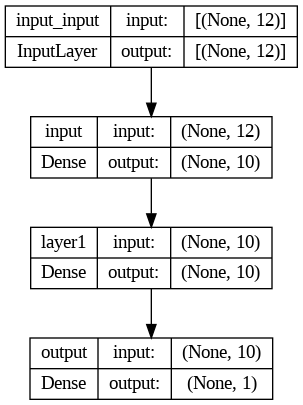

In [27]:
from keras import utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

### Compile Model & Fit Model

In [28]:
model.compile(
        loss="binary_crossentropy", 
        optimizer="adam",
        metrics=["accuracy"]
    )
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
250/250 [==============================] - 2s 3ms/step - loss: 0.6260 - accuracy: 0.6574 - val_loss: 0.5007 - val_accuracy: 0.8060
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.8077 - val_loss: 0.4408 - val_accuracy: 0.8120
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.8167 - val_loss: 0.4179 - val_accuracy: 0.8225
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8242 - val_loss: 0.4048 - val_accuracy: 0.8320
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8294 - val_loss: 0.3891 - val_accuracy: 0.8445
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8378 - val_loss: 0.3732 - val_accuracy: 0.8555
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8470 - val_loss: 0.3613 - val_accuracy: 0.8605

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

63/63 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8555
Accuracy: 85.55


### Plot Loss & Val Loss Chart For Train & Test

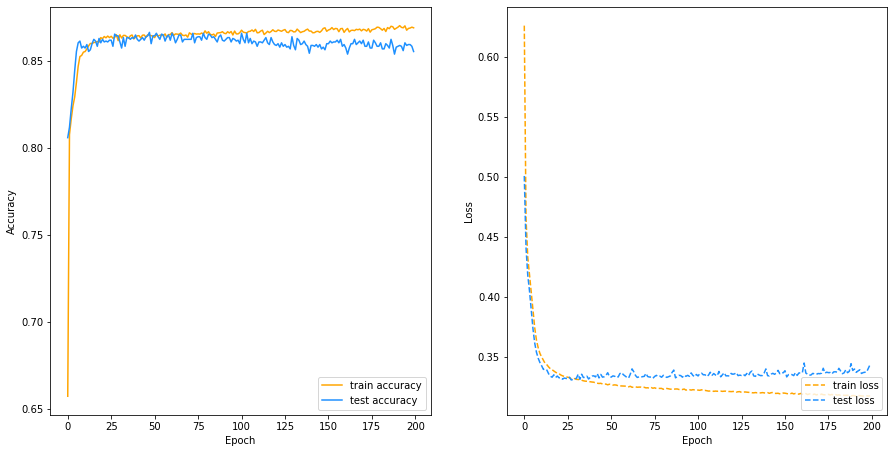

In [30]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.plot(history.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='orange', ls='--')
plt.plot(history.history['val_loss'],
         label='test loss',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

### Predict Test

In [31]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 963us/step


In [32]:
y_pred = (y_pred > 0.5)

In [33]:
dframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.reshape(y_test.shape[0],)})
dframe.head(10)

,Actual,Predicted
0,0,False
1,1,False
2,0,False
3,0,False
4,0,False
5,1,True
6,0,False
7,0,False
8,1,False
9,1,True
